<a href="https://colab.research.google.com/github/junduk123/Machine-Learning-Task/blob/main/Task3/CreditDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
# Replace 'your_file_path' with the actual path to your dataset in Colab or use file upload mechanism
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_csv(io.BytesIO(uploaded['CreditDataset.csv']))

Saving CreditDataset.csv to CreditDataset.csv


In [ ]:
# Display first few rows of the dataset
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
# Extract features and target
X = data.drop(columns=['Class'])
y = data['Class'].apply(lambda x: 1 if x == 1 else 0)  # Binarize target: 1 if Class is 1, else 0

In [ ]:
# Identify categorical features (assuming all 'Ax' formatted columns are categorical)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Preprocessing pipeline (OneHotEncoding for categorical variables)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # drop='first' to avoid multicollinearity
    ], remainder='passthrough')  # Leave non-categorical columns untouched

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a pipeline with preprocessing and logistic regression model
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))  # Increase max_iter to avoid convergence warnings

In [ ]:
# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['x1', 'x3', 'x4', 'x6', 'x7',
                                                   'x9', 'x10', 'x12', 'x14',
                                                   'x15', 'x17', 'x19',
                                                   'x20'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

In [ ]:
# Evaluation Metrics

# Accuracy, Precision, Recall, F1 Score
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.70      0.54      0.61        59
     Class 1       0.82      0.90      0.86       141

    accuracy                           0.80       200
   macro avg       0.76      0.72      0.74       200
weighted avg       0.79      0.80      0.79       200



In [ ]:
# AUC-ROC Score
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC-ROC Score: {auc:.2f}")


AUC-ROC Score: 0.82


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 32  27]
 [ 14 127]]


In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

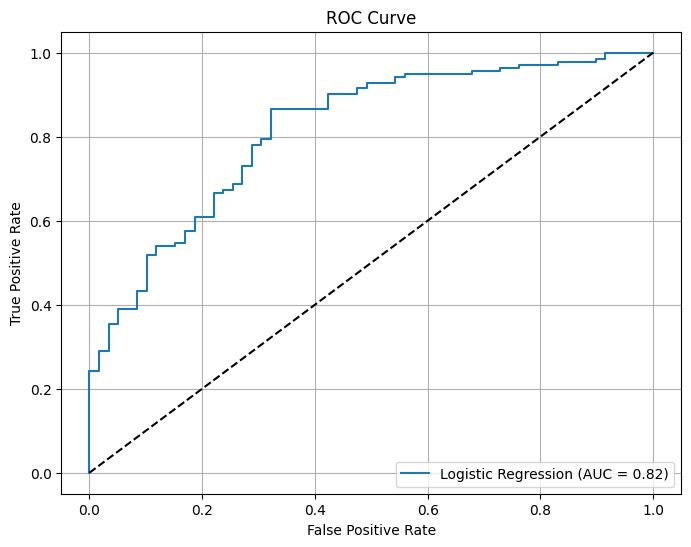

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()